# Z transform

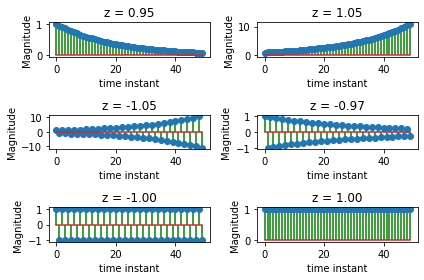

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(0,50)
z = [0.95,1.05,-1.05,-0.97,-1,1]
j=1
for i in z:
    plt.subplot(3,2,j)
    plt.stem(n,i**n,'g',use_line_collection= True)
    plt.title('z = %1.2f' %i)
    plt.xlabel('time instant')
    plt.ylabel('Magnitude')
    j = j+1
plt.tight_layout()
plt.show()


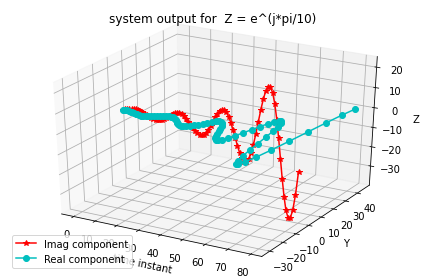

Unstable response


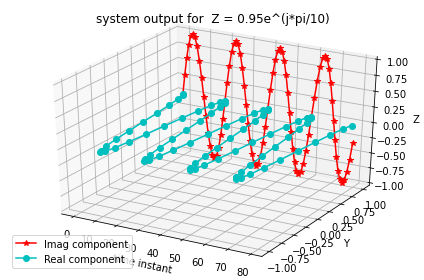

Oscillatory response


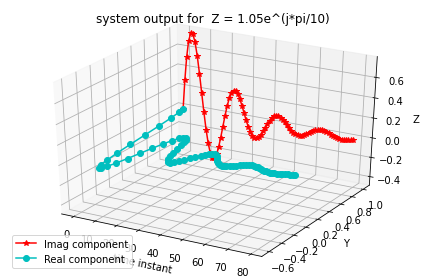

Stable and Underedamped Response


In [ ]:
u = np.arange(0,80)
z = [1.05*np.e**((0+1j)*np.pi/10),np.e**((0+1j)*np.pi/10),0.95*np.e**((0+1j)*np.pi/10)]
Z = ['Z = e^(j*pi/10)','Z = 0.95e^(j*pi/10)','Z = 1.05e^(j*pi/10)']
resp = ['Unstable response','Oscillatory response','Stable and Underedamped Response']
for i in range(len(z)):
  fig = plt.figure()
  ax = fig.gca(projection = '3d')
  ax.plot(u,ys = np.ones(len(u)),zs = np.imag(z[i]**u),c = 'r',marker ='*',label='Imag component')
  ax.plot(u,np.real(z[i]**u),zs = 0,c = 'c',marker ='o',label='Real component')
  ax.set_xlabel('time instant')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  plt.legend(loc = 3)
  plt.title('system output for  %s' %Z[i])
  plt.tight_layout()
  plt.show()
  print('%s' %resp[i])

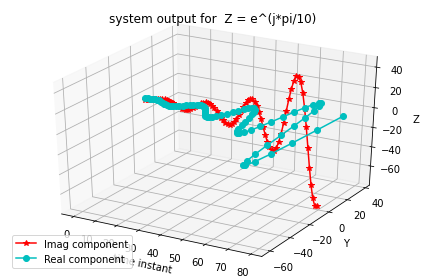

Eigen value = 2


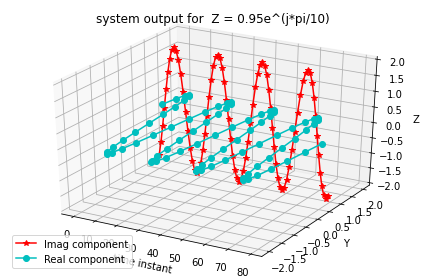

Eigen value = 2


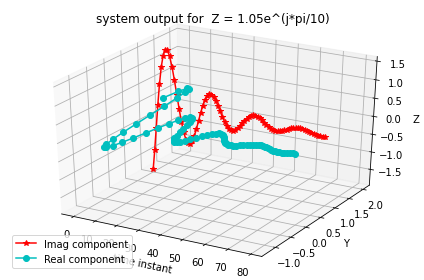

Eigen value = 2


In [ ]:
# system = 2x[n-3]
z = [1.05*np.e**((0+1j)*np.pi/10),np.e**((0+1j)*np.pi/10),0.95*np.e**((0+1j)*np.pi/10)]
Z = ['Z = e^(j*pi/10)','Z = 0.95e^(j*pi/10)','Z = 1.05e^(j*pi/10)']
def system(x,n):
    return 2*x**(n-3)
# def soln(z):
for i in range(len(z)):
  fig = plt.figure()
  ax = fig.gca(projection = '3d')
  ax.plot(u,ys = np.ones(len(u)),zs = np.imag(system(z[i],u)),c = 'r',marker ='*',label='Imag component')
  ax.plot(u,np.real(system(z[i],u)),zs = 0,c = 'c',marker ='o',label='Real component')
  ax.set_xlabel('time instant')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  plt.legend(loc = 3)
  plt.title('system output for  %s' %Z[i])
  plt.tight_layout()
  plt.show()
  print('Eigen value = %d'%2)
# soln(1.05*np.e**((0+1j)*np.pi/10))
# soln(np.e**((0+1j)*np.pi/10))
# soln(0.95*np.e**((0+1j)*np.pi/10))

**Magnitude Spectrum**

Text(0.5, 1.0, 'Phase Spectrum')

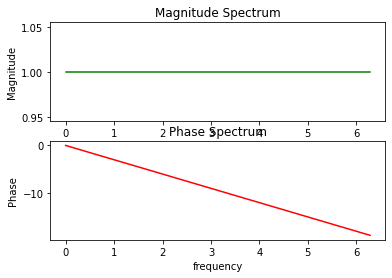

In [12]:

plt.subplot(211)
plt.plot(w,abs(np.e**(-(0+1j)*3*w)),'g')
plt.title('Magnitude Spectrum')
plt.ylabel('Magnitude')
plt.subplot(212)
plt.plot(w,np.unwrap(np.angle(np.e**(-(0+1j)*3*w))),'r')
plt.ylabel('Phase')
plt.xlabel('frequency')
plt.title('Phase Spectrum')

***Z TRANSFORM***

In [9]:

def Z(x):
    mspectra = []
    pspectra = []

    for i in range(len(w)):
        z = np.e**((0+1j)*w[i])
        # for j in range(len(x)):
        p = sum(np.real(x[i] * z**(-i)) for i in range(len(x)))
        q = sum(np.imag(x[i] * z**(-i)) for i in range(len(x)))
        mspectra.append(np.sqrt(p**2+q**2))
        pspectra.append(np.angle(p+q*np.e**((0+1j)*np.pi/2)))
    return mspectra,pspectra


In [3]:
def impulse(n):
  return [1]+ list(0 for i in range(len(n)-1))
def step(n):
  return 1 * (n>=0)
def ramp(n):
  return n * (n>=0)
def par(n):
  return 0.5*n**2 * (n>=0)
def expo(n,alpha):
  n = np.array(n)
  return alpha**n * (n>=0)
def sclexpo(n,alpha):
  n = np.array(n)
  return n * alpha**n * (n>=0)
def cosexpo(n,r,w0):
  n = np.array(n)
  return r**n * np.cos(w0*n) * (n>=0)

*Lets find out the magnitude spectra and phase spectra for the above given signals*

**Impulse Function**

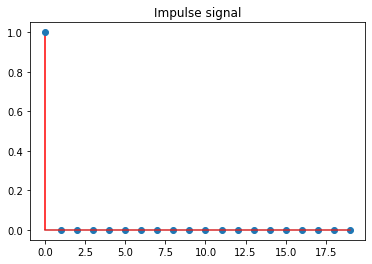

In [11]:
u = np.arange(0,20)
w = np.linspace(0,2*np.pi,100)
plt.stem(u,impulse(u),'ro',use_line_collection = 'True')
plt.title('Impulse signal')
plt.show()

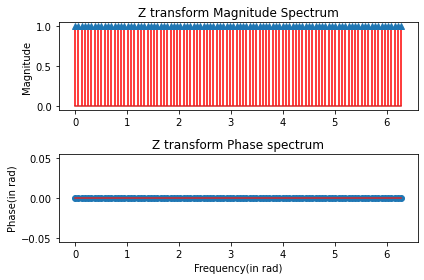

In [12]:
import sympy as sp
sp.init_printing()
u = np.arange(0,20)
def soln(fn):
  M,P = Z(fn) 
  plt.subplot(211)
  plt.stem(w,M,'r',markerfmt='^',use_line_collection = True)
  plt.title('Z transform Magnitude Spectrum')
  plt.ylabel('Magnitude')
  plt.subplot(212)
  plt.stem(w,P,'m',markerfmt='o',use_line_collection = True)
  plt.title('Z transform Phase spectrum')
  plt.ylabel('Phase(in rad)')
  plt.xlabel('Frequency(in rad)')
  plt.tight_layout()
soln(impulse(u))

Z Transform = 1

**Step signal**

Z TRANSFORM of step signal


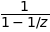

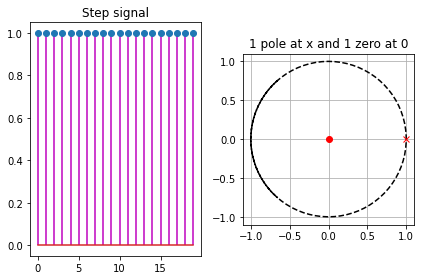

In [44]:
z  = sp.symbols('z')
print('Z TRANSFORM of step signal')
zt = 1/(1-z**(-1))
w = np.linspace(-4,4,100)
x,y = np.cos(w),np.sin(w)
display(zt)
plt.subplot(121)
plt.stem(u,step(u),'m',use_line_collection=True)
plt.title('Step signal')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot(1,0,'rx',label = 'one pole at x')
plt.plot(0,0,'ro',label = 'One zero at o')
plt.gca().set_aspect('equal')
plt.title('1 pole at x and 1 zero at 0')
plt.tight_layout()
plt.grid()
plt.show()

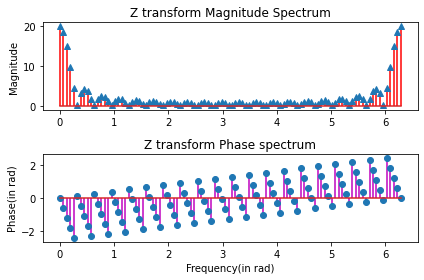

In [ ]:
soln(unit(u))

***Ramp signal***

Z Transform of ramp signal


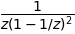

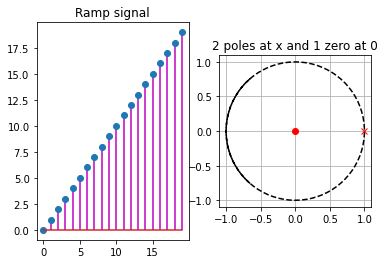

In [43]:

ztr = -z*(sp.diff(zt,z))
print('Z Transform of ramp signal')
display(ztr)
plt.subplot(121)
plt.stem(u,ramp(u),'m',use_line_collection=True)
plt.title('Ramp signal')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot(1,0,'rx',label = 'Two poles at x')
plt.plot(0,0,'ro',label = 'One zero at o')
# plt.legend(loc=1)
plt.gca().set_aspect('equal')
plt.title('2 poles at x and 1 zero at 0')
plt.grid()
plt.show()

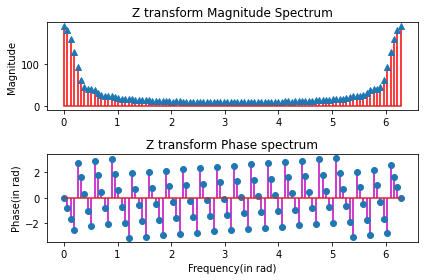

In [ ]:
soln(ramp(u))

***Parabolic signal***

Z TRANSFORM of Parabolic signal


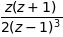

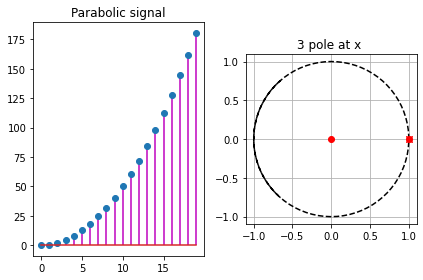

In [42]:
print('Z TRANSFORM of Parabolic signal')
ztp = -z*(sp.diff(ztr,z))/2
display(ztp.simplify())
plt.subplot(121)
plt.stem(u,par(u),'m',use_line_collection=True)
plt.title('Parabolic signal')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot([1,1,1],[0,0,0],'rx')
plt.plot([1,0],[0,0],'ro')
plt.gca().set_aspect('equal')
plt.title('3 pole at x ')
plt.tight_layout()
plt.grid()
plt.show()

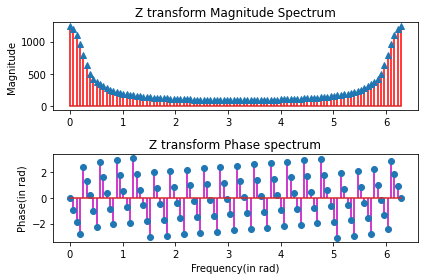

In [ ]:
soln(par(u))

***Exponential signal(alpha = 0.8)***

Z TRANSFORM of Exponential signal


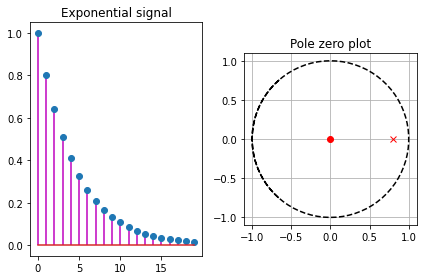

In [48]:
print('Z TRANSFORM of Exponential signal')
ztex1 = 1/(1-0.8*z**(-1))
display(ztex1.simplify())
plt.subplot(121)
plt.stem(u,expo(u,0.8),'m',use_line_collection=True)
plt.title('Exponential signal')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot(0.8,0,'rx')
plt.plot(0,0,'ro')
plt.gca().set_aspect('equal')
plt.title('Pole zero plot')
plt.tight_layout()
plt.grid()
plt.show()

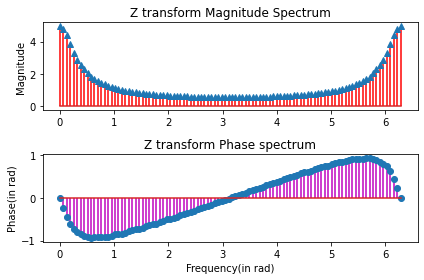

In [ ]:
soln(expo(u,0.8))

***Exponential signal(alpha = 1.2)***

Z TRANSFORM of Exponential signal(apha = 1.2)


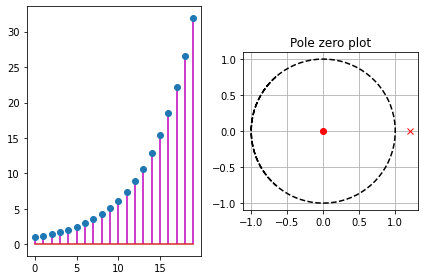

In [49]:
print('Z TRANSFORM of Exponential signal(apha = 1.2)')
ztex2 = 1/(1-1.2*z**(-1))
display(ztex2.simplify())
plt.subplot(121)
plt.stem(u,expo(u,1.2),'m',use_line_collection=True)
# plt.title('Exponential signal')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot(1.2,0,'rx')
plt.plot(0,0,'ro')
plt.gca().set_aspect('equal')
plt.title('Pole zero plot')
plt.tight_layout()
plt.grid()
plt.show()

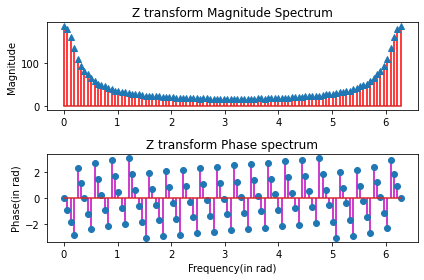

In [ ]:
soln(expo(u,1.2))

***Scaled exponential for alpha =0.8***

Z TRANSFORM of n*0.8^n*u_n


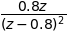

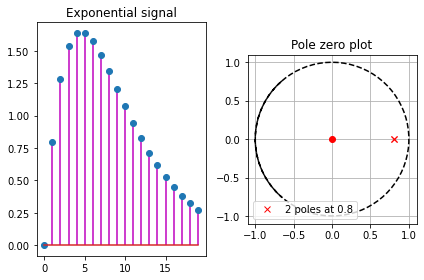

In [56]:
print('Z TRANSFORM of n*0.8^n*u_n')
ztscex = -z*sp.diff(ztex1)
display(ztscex.simplify())
plt.subplot(121)
plt.stem(u,sclexpo(u,0.8),'m',use_line_collection=True)
plt.title('Exponential signal')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot([0.8,0.8],[0,0],'rx',label = '2 poles at 0.8')
plt.plot(0,0,'ro')
plt.gca().set_aspect('equal')
plt.title('Pole zero plot')
plt.tight_layout()
plt.legend(loc=3)
plt.grid()
plt.show()

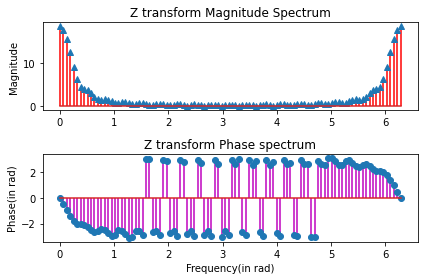

In [ ]:
soln(sclexpo(u,0.8))

***Cosine exponential r = 0.5 and w0 = pi rad***

Z TRANSFORM of Cosine Exponential signal


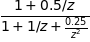

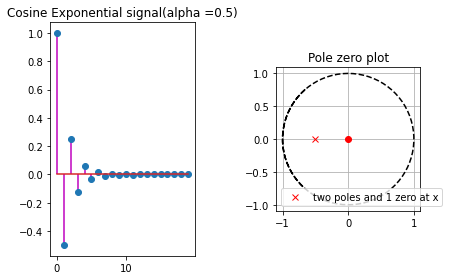

In [81]:
print('Z TRANSFORM of Cosine Exponential signal')
ztce = (1-0.5*sp.cos(sp.pi)*z**-1)/(1-sp.cos(sp.pi)*z**-1+0.25*z**-2)
display(ztce)
plt.subplot(121)
plt.stem(u,cosexpo(u,0.5,np.pi),'m',use_line_collection=True)
plt.title('Cosine Exponential signal(alpha =0.5)')
r = x**2+y**2-1
plt.subplot(122)
plt.plot(x,y,'k--')
plt.plot(-0.5,0,'rx',label='two poles and 1 zero at x')
plt.plot(0,0,'ro')
plt.gca().set_aspect('equal')
plt.title('Pole zero plot')
plt.tight_layout()
plt.grid()
plt.legend(loc=3)
plt.show()

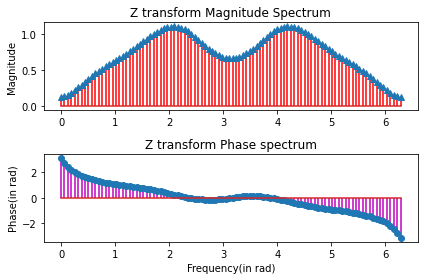

In [ ]:
soln(cosexpo(u,0.5,np.pi))

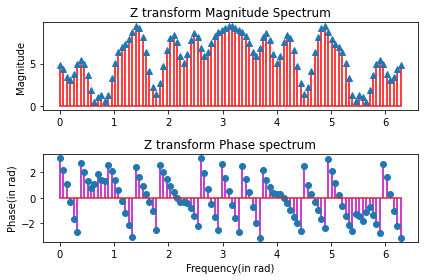

In [ ]:
soln(cosexpo(u,1.05,np.pi))

***Discrete Time Fourier Series***

*The given series is periodic with period is 5 hence a(k) = a(k+5), Put k = -1 hence we have a(-1) = a(4) = conj(a(1)) and put k = -2 We have a(-3) = a(2) = conj(a(3))*

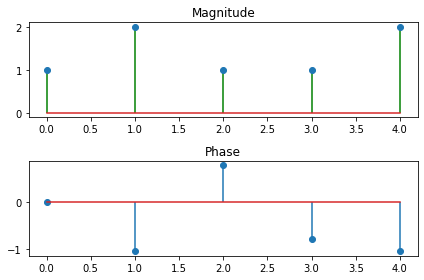

In [ ]:
a = [ 1 , 2*np.e**(-(0+1j)*np.pi/3) , np.e**((0+1j)*np.pi/4) , np.e**(-(0+1j)*np.pi/4) , 2*np.e**(-(0+1j)*np.pi/3)]
plt.subplot(211)
plt.stem(range(len(a)),list(map(abs,a)),'g',use_line_collection=True)
plt.title('Magnitude')
plt.subplot(212)
plt.stem(range(len(a)),list(map(np.angle,a)),'v',use_line_collection=True)
plt.title('Phase')
plt.tight_layout()
plt.show()

***Square Wave of period N=16***

Text(0.5, 1.0, 'Square Wave')

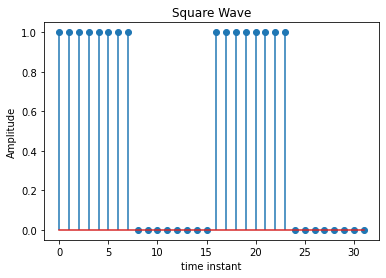

In [ ]:
def sqrk(n):
    p = n/16
    z=[]
    for i in range(int(p)):
        z = z+[1 for i in range(8)] + [0 for i in range(8)]
    return z
plt.stem(range(32),sqrk(32),use_line_collection=True)
plt.xlabel('time instant')
plt.ylabel('Amplitude')
plt.title('Square Wave')

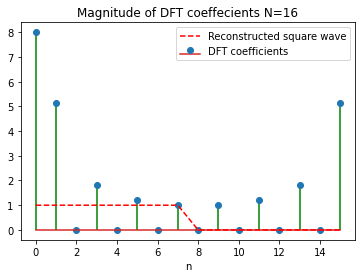

In [ ]:
sqrFT = np.fft.fft(sqrk(16))  # DFT coeffs of square wave
plt.stem(range(16),list(map(abs,sqrFT)),'g',use_line_collection=True,label = 'DFT coefficients')
plt.title('Magnitude of DFT coeffecients N=16')
plt.xlabel('n')
# reconstruction of square wave
sqrW = np.fft.ifft(sqrFT) # Reconstructed Square wave
plt.plot(range(16),list(map(abs,sqrW)),'r--',label = 'Reconstructed square wave')
plt.legend()
plt.show()

*CONTINUOUS TIME FOURIER TRANSFORM*

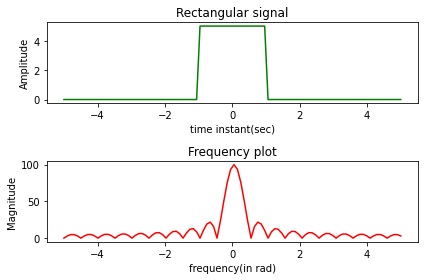

In [83]:
t = np.linspace(-5,5,100)
def rect(t,scale):
  a = np.array(step(t+1))
  b = np.array(step(t-1))
  return scale*(a - b)
plt.subplot(211)
plt.plot(t,rect(t,5),'g')
plt.title('Rectangular signal')
plt.ylabel('Amplitude')
plt.xlabel('time instant(sec)')
plt.subplot(212)
fft = np.fft.fftshift(np.fft.fft(rect(t,5)))
plt.plot(t,np.abs(fft),'r')
plt.xlabel('frequency(in rad)')
plt.ylabel('Magnitude')
plt.title('Frequency plot')
plt.tight_layout()
plt.show()

***Modulation***

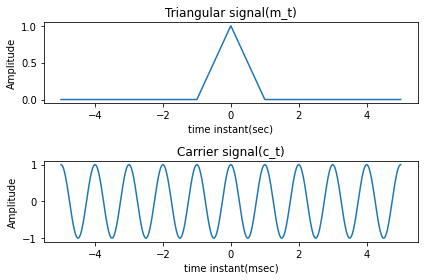

In [42]:
def m(t):
  return (ramp(t-1) - 2*ramp(t) + ramp(t+1))
w = np.linspace(-5,5,1000)
plt.subplot(211)
plt.plot(w,m(w))
plt.title('Triangular signal(m_t)')
plt.ylabel('Amplitude')
plt.xlabel('time instant(sec)')
fc = 1      # carrier signal of frequency 1kHZ
def c(t):
  return np.cos(2*np.pi*fc*t)
plt.subplot(212)
plt.plot(w,c(w)) 
plt.title('Carrier signal(c_t)')
plt.ylabel('Amplitude')
plt.xlabel('time instant(msec)')
plt.tight_layout()
plt.show()

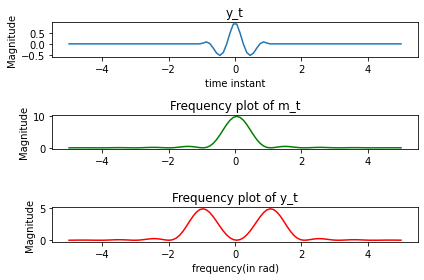

In [47]:
t = np.linspace(-5,5,100)
y = [m(i) * c(i) for i in t]
fftM = np.fft.fftshift(np.fft.fft(m(t)))
fftC = np.fft.fftshift(np.fft.fft(y))
plt.subplot(311)
plt.plot(t,y)
plt.title('y_t')
plt.xlabel('time instant')
plt.ylabel('Magnitude')
plt.subplot(312)
plt.plot(t,list(map(abs,fftM)),'g')
plt.ylabel('Magnitude')
plt.title('Frequency plot of m_t')
plt.subplot(313)
plt.plot(t,list(map(abs,fftC)),'r')
plt.xlabel('frequency(in rad)')
plt.ylabel('Magnitude')
plt.title('Frequency plot of y_t')
plt.tight_layout()
plt.show()

***Getting Triangular signal from Rectangular signals***

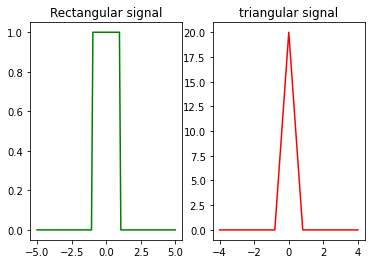

In [86]:
#### This can be done by convolving same length of rectangular signals
plt.subplot(121)
fn1 = rect(t,1)
plt.plot(t,fn1,'g')
plt.title('Rectangular signal')
tri = np.convolve(fn1,fn1)
t2 = np.linspace(-4,4,len(tri))
plt.subplot(122)
plt.plot(t2,tri,'r')
plt.title('triangular signal')
plt.show()

*As we know convolution in time operation is multiplication in frequency domain . Hence to get the frequency spectrum of the triangular signal we just need to multiply the both sequences*

# END